In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('bank-additional-full.csv',sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
df.info() # sin Nan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

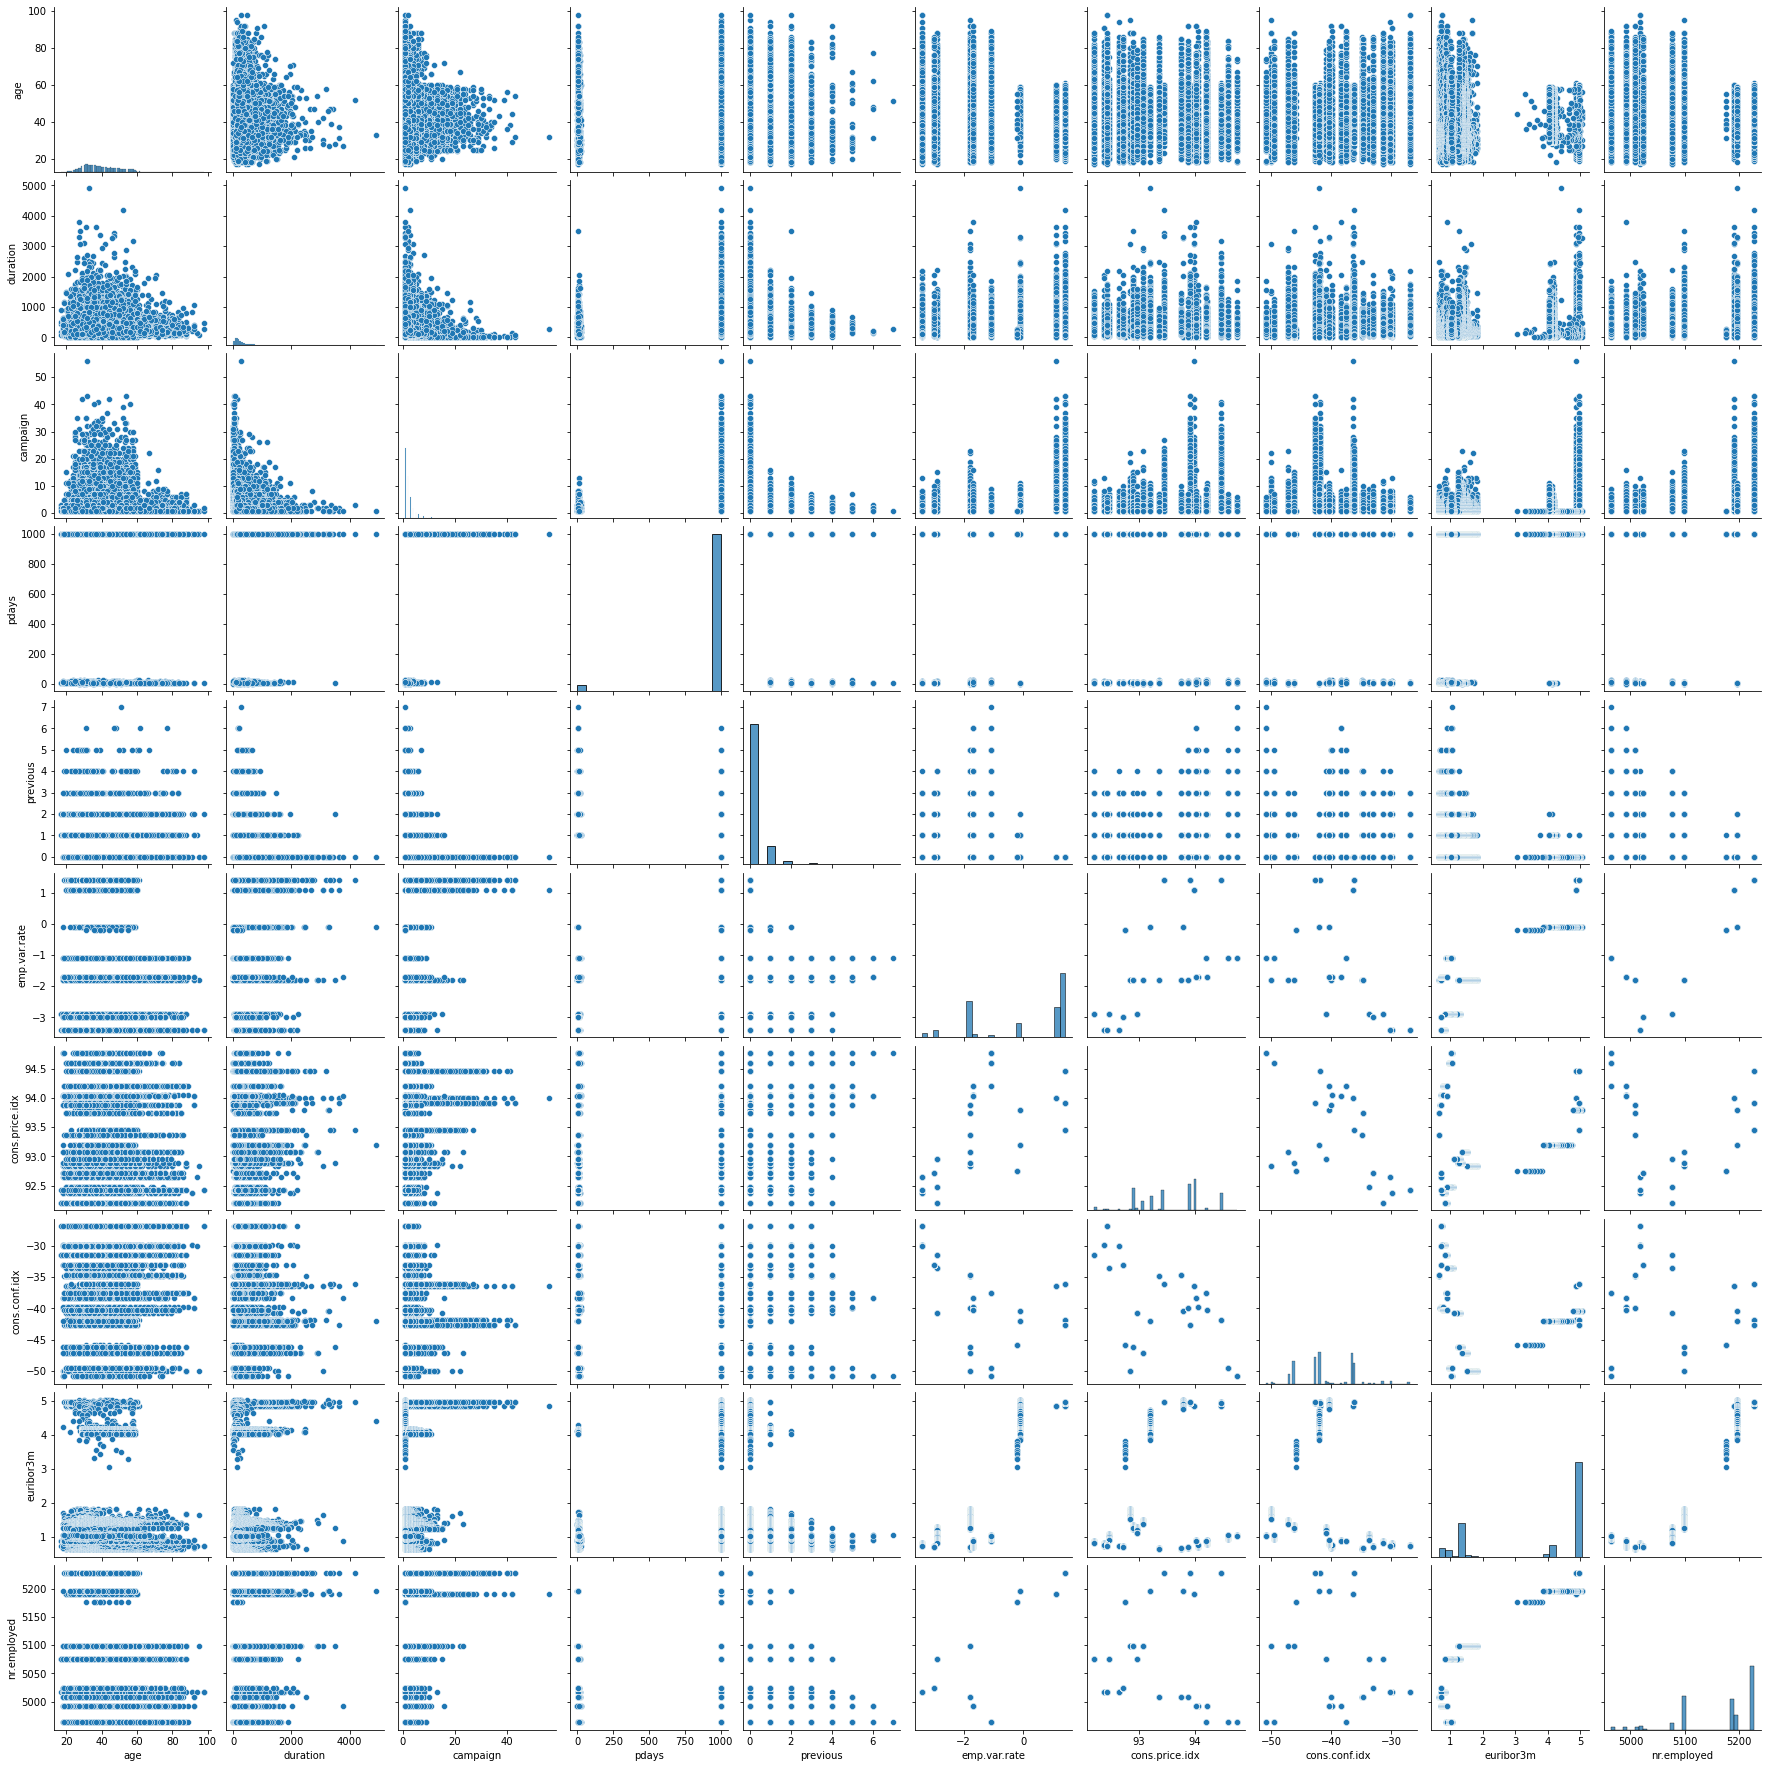

In [7]:
sns.pairplot(df)

<AxesSubplot:>

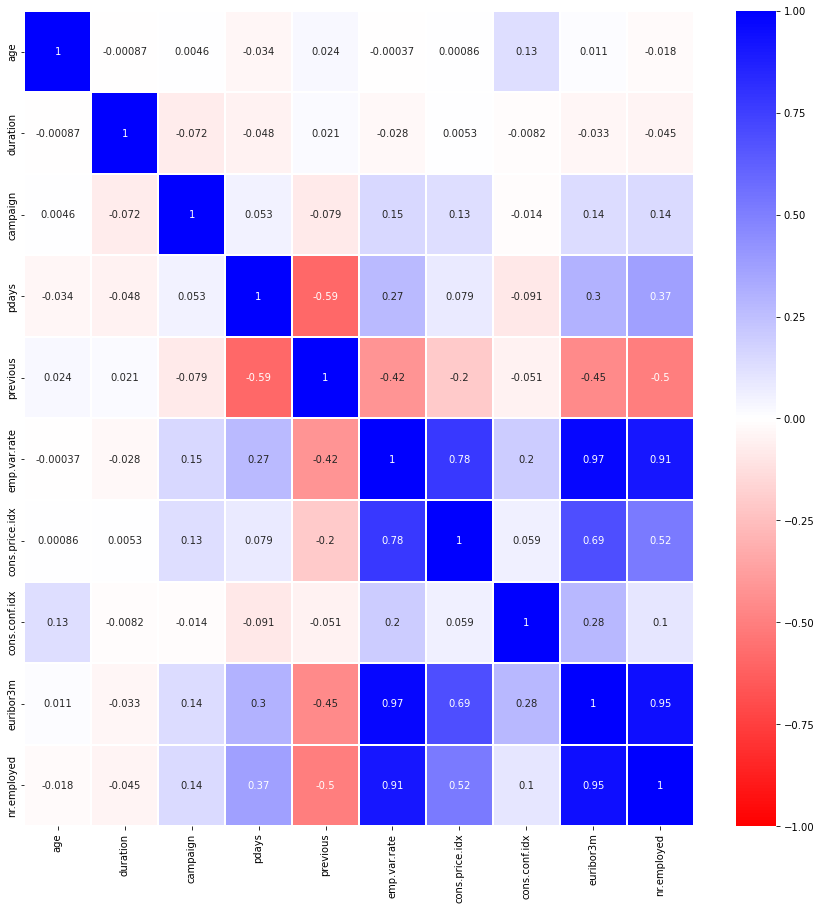

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot= True, vmin=-1,vmax=1,cmap="bwr_r",linewidths=.4)

# Multivariate

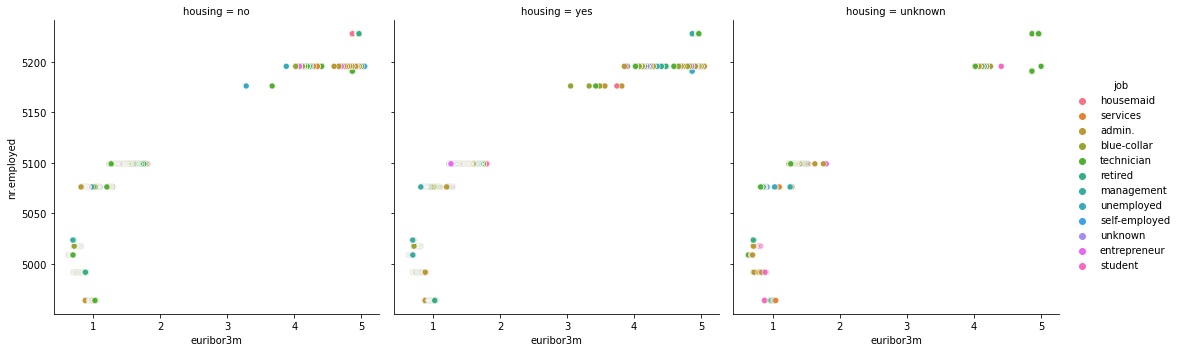

In [9]:
sns.relplot(data=df, x='euribor3m', y = 'nr.employed',hue='job', kind = 'scatter', col = 'housing')

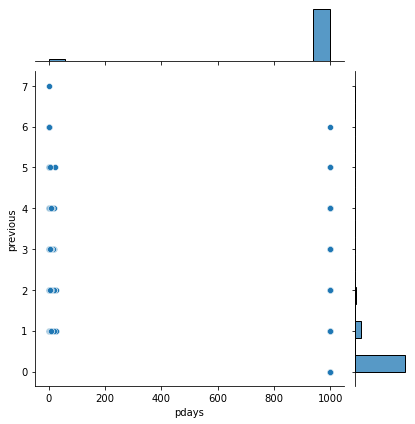

In [10]:
sns.jointplot(data = df,x = 'pdays',y = 'previous')
#Eliminamos el valor 999 de la columns de Pdays

In [11]:
df_2 = df[df['pdays'] != 999]
#Eliminamos el valor 999 de la columns de Pdays

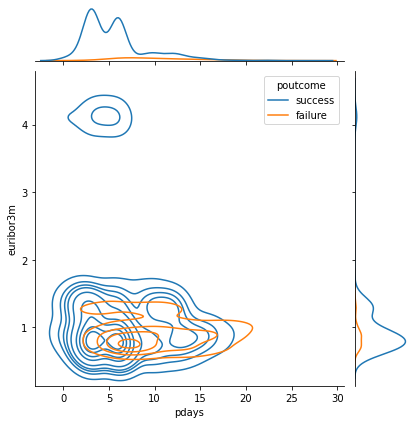

In [12]:
sns.jointplot(data = df_2,x = 'pdays',y = 'euribor3m',kind="kde", hue = 'poutcome')

In [14]:
df.describe(include = ['O']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

C:\Users\jonat\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\Users\jonat\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\jonat\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


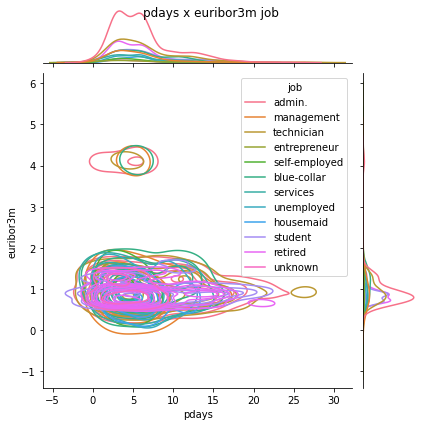

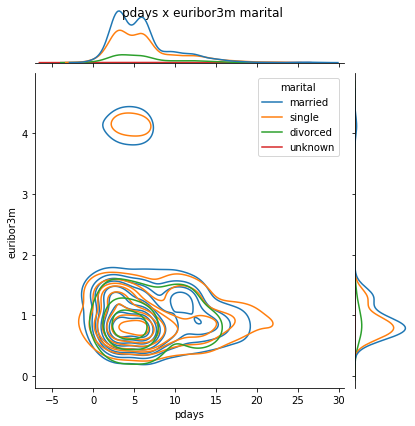

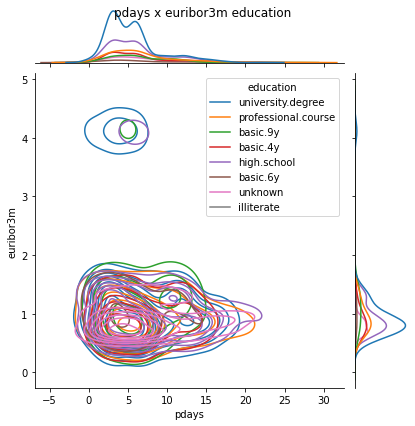

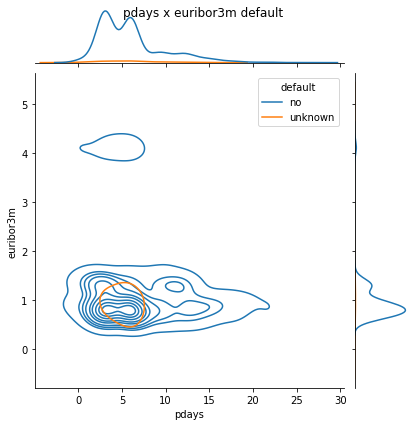

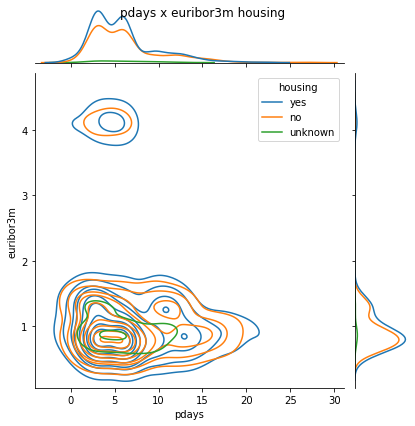

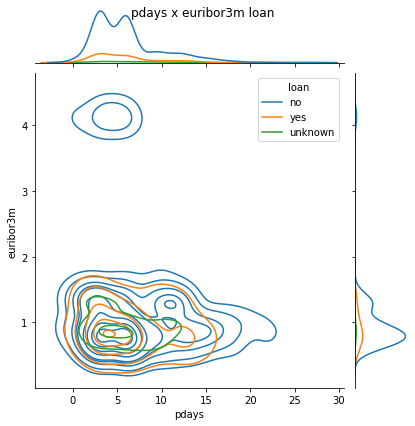

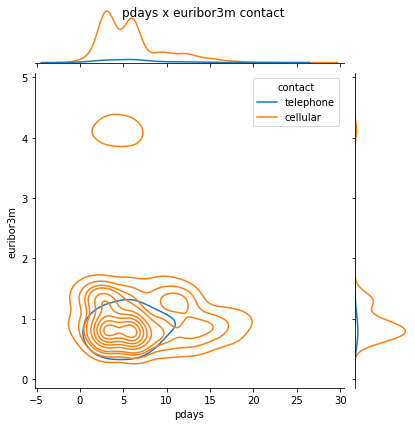

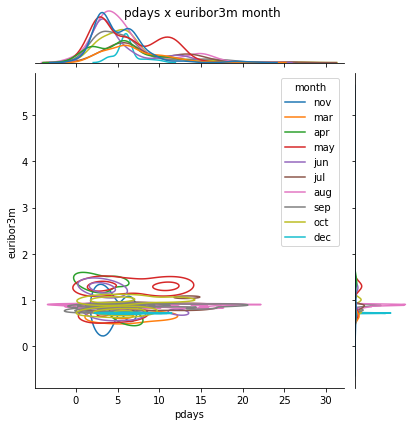

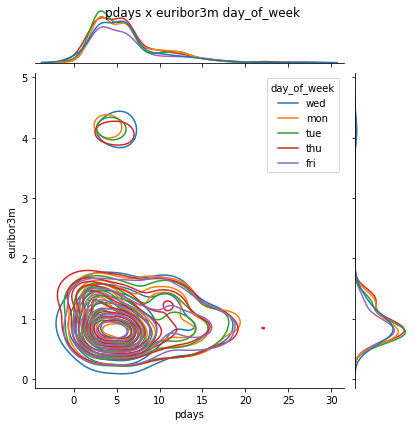

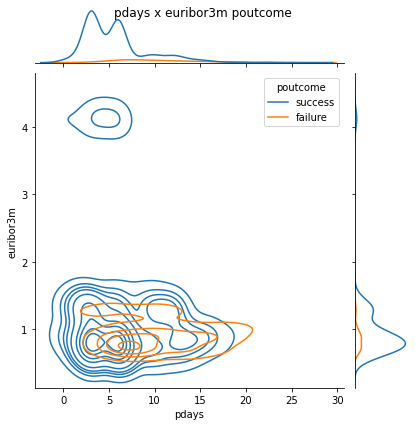

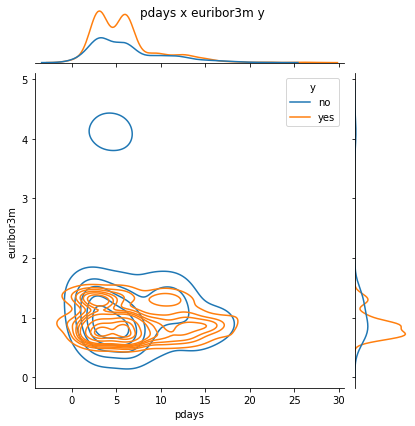

In [22]:
# Utilizamos un pdays x euribor3m con el hue de toda sla variables categoricas 
for i in df.describe(include = ['O']).columns:
    title = 'pdays x euribor3m {}'.format(i)
    #plt.figure(figsize=(8, 6), dpi=80)
    p = sns.jointplot(data = df_2,x = 'pdays',y = 'euribor3m',kind="kde", hue = i)
    p.fig.suptitle(title)

<AxesSubplot:xlabel='age', ylabel='duration'>

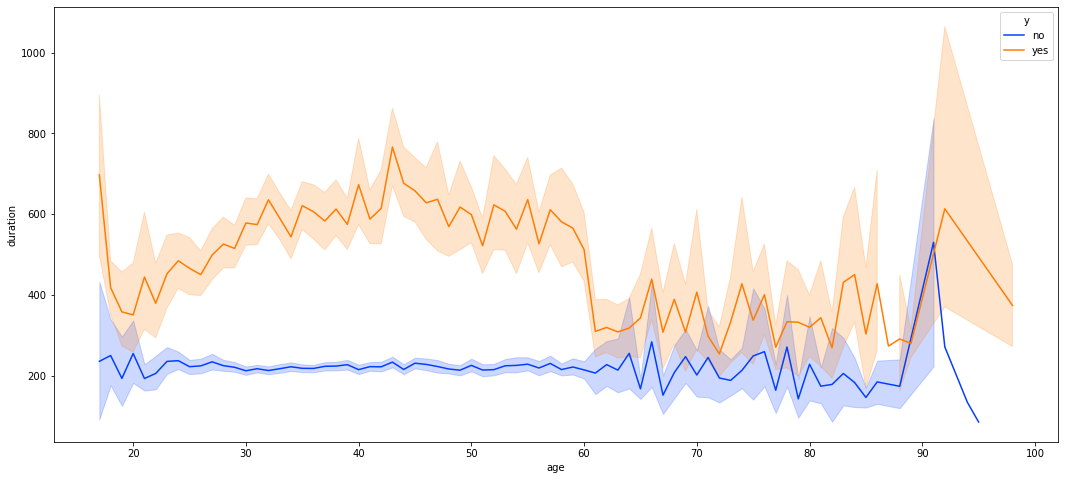

In [71]:
plt.figure(figsize=(18,8))
sns.lineplot(x="age", y="duration",data=df,palette='bright',hue='y')

<AxesSubplot:xlabel='age', ylabel='duration'>

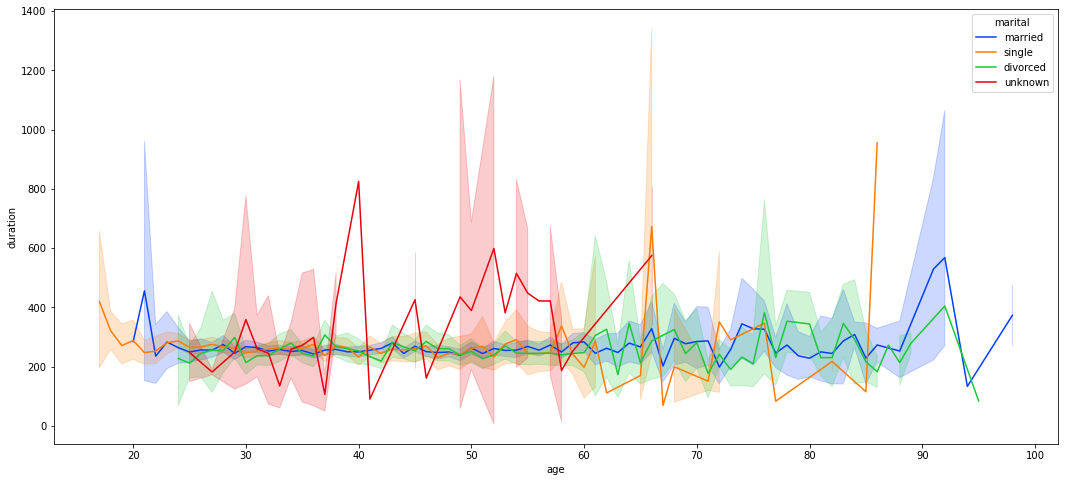

In [72]:
plt.figure(figsize=(18,8))
sns.lineplot(x="age", y="duration",data=df,palette='bright',hue='marital')

Text(0.5, 0.98, 'Campaign y Marital segmentado por el Target')

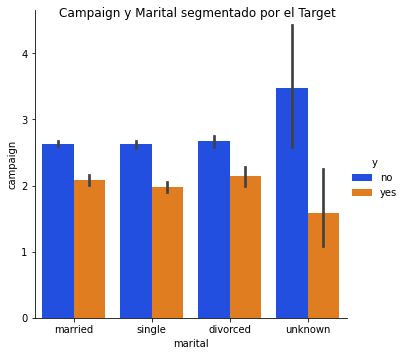

In [65]:
figure = sns.catplot(data = df, x = 'marital',y = 'campaign',hue = 'y', palette='bright', kind='bar')
figure.fig.suptitle('Campaign y Marital segmentado por el Target')

# Llegamos a la conclusion de que los Status de Married, single and Divorced son constantes.